In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
from datetime import timedelta

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
sns.set_context("talk")
%matplotlib inline

In [2]:
# load tresspasser.csv files
df_tresspasser = pd.read_csv("data/trespasser/221002/Midland.csv", index_col=0)
#df_tresspasser = df_tresspasser[df_tresspasser['start_time'].str.match('^10/4/2022.*M$')== True]
display(df_tresspasser.head(3))
print(df_tresspasser.info())

,start_time,end_time,type,trajectory,location_id,weather,clip,validation,explanation
_id,,,,,,,,,
"""6339259a0a5f9d9378d405ac""","10/2/2022, 1:45:55 AM","10/2/2022, 1:46:02 AM",car,"[[1255.5,454.5],[1253.25,449.625],[1248.75,448...","""6255092968981447d491ef3a""",Clouds,"=HYPERLINK(""https://igct-test.s3.amazonaws.com...",True,NaN
"""63396c550a5f9d9378d405b8""","10/2/2022, 6:47:25 AM","10/2/2022, 6:47:49 AM",car,"[[1290,427.875],[1287.75,427.125],[1285.5,427....","""6255092968981447d491ef3a""",Clouds,"=HYPERLINK(""https://igct-test.s3.amazonaws.com...",True,NaN
"""63396e3c0a5f9d9378d405b9""","10/2/2022, 6:55:50 AM","10/2/2022, 6:55:56 AM",car,"[[1284,422.25],[1278.75,419.25],[1278,420.75],...","""6255092968981447d491ef3a""",Clouds,"=HYPERLINK(""https://igct-test.s3.amazonaws.com...",True,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, "6339259a0a5f9d9378d405ac" to "63422a710a5f9d9378d4199a"
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   start_time   400 non-null    object
 1   end_time     400 non-null    object
 2   type         400 non-null    object
 3   trajectory   400 non-null    object
 4   location_id  400 non-null    object
 5   weather      400 non-null    object
 6   clip         400 non-null    object
 7   validation   400 non-null    bool  
 8   explanation  85 non-null     object
dtypes: bool(1), object(8)
memory usage: 28.5+ KB
None


In [3]:
NofT = df_tresspasser['validation'].value_counts()[True]
NofF = df_tresspasser['validation'].value_counts()[False]
# Change the string to datetime
df_tresspasser['start_time'] = pd.to_datetime(df_tresspasser['start_time'])
df_tresspasser['end_time'] = pd.to_datetime(df_tresspasser['end_time'])



In [4]:
# Create a new dataframe and Record the Number of "True" and "False" by specific "time intervel"

index = 0
update_minus = 60 # unit minus
updated_time = df_tresspasser['start_time'][0]+ timedelta(minutes=update_minus)
nTrue = 0
nFalse = 0

df_tress = pd.DataFrame({
    'timestape': [],
    'numberOfTrue': [],
    'numberOfFalse': []
})

while index < len(df_tresspasser.index):
    if df_tresspasser['start_time'][index] <= updated_time:
        if df_tresspasser['validation'][index] == True:
            nTrue = nTrue+1
        else:
            nFalse = nFalse+1
        index = index+1
    else:
        temp = {'timestape': updated_time, 'numberOfTrue': nTrue, 'numberOfFalse': nFalse}
        df_tress = df_tress.append(temp, ignore_index = True)
        updated_time = updated_time + timedelta(minutes=update_minus)
        if df_tresspasser['validation'][index] == True:
            nTrue = 0
            nFalse = 0
        else:
            nFalse = 0
            nTrue = 0
        
 


#print(df_tresspasser['start_time'][len(df_tresspasser. index)-1])

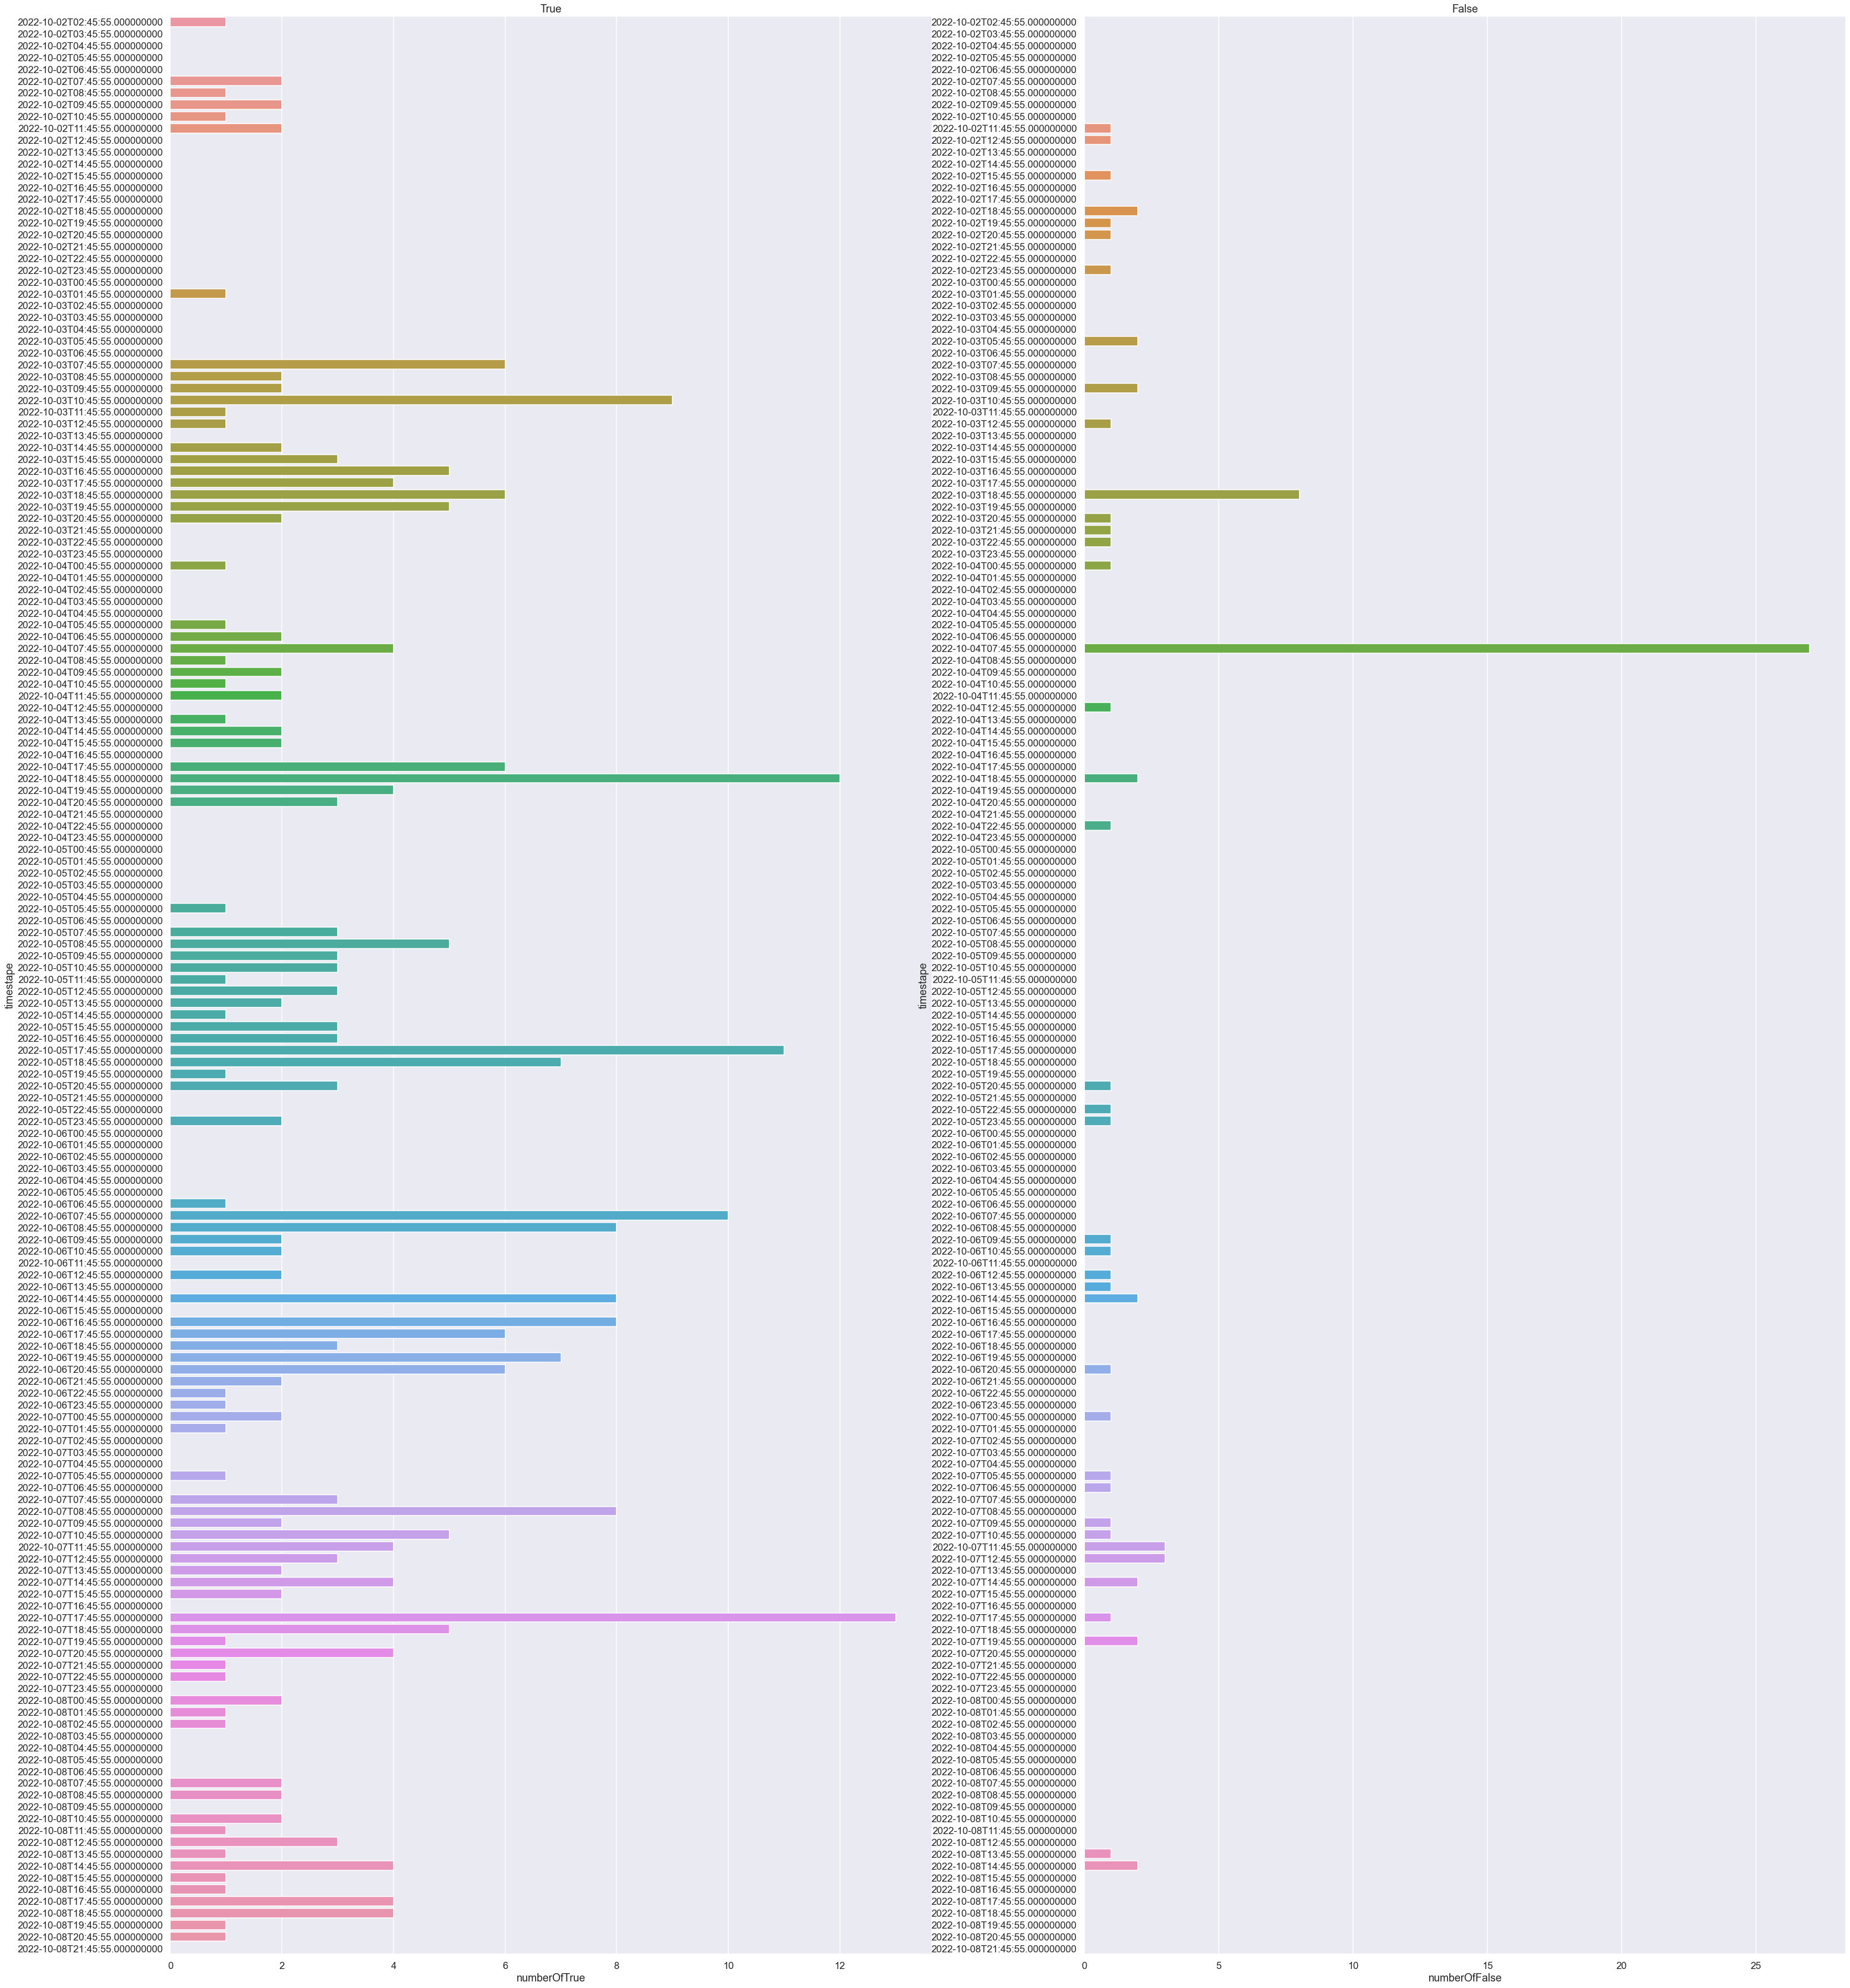

In [5]:
# plot the figure


plt.figure(figsize=(45, 60))

plt.subplot(121)

#plot1 = sns.barplot(data=df_tress, x="numberOfTrue", y="timestape", hue="numberOfFalse")
plot1 = sns.barplot(x='numberOfTrue',y = 'timestape',data=df_tress)
plot1.set_title('True')

plt.subplot(122)
plot2 =sns.barplot(x='numberOfFalse',y = 'timestape',data=df_tress)
plot2.set_title('False')

plt.show()


<Figure size 3240x4320 with 0 Axes>

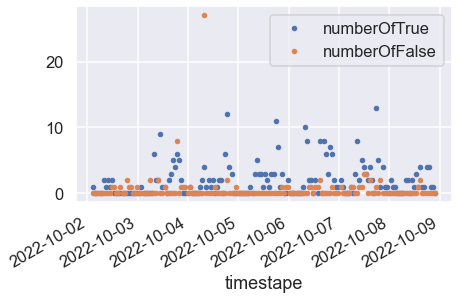

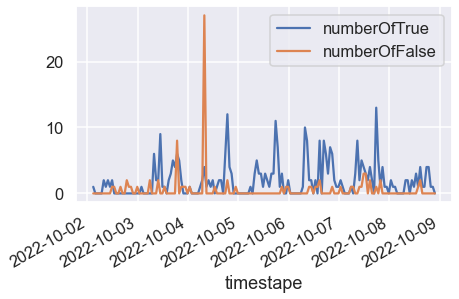

In [6]:
plt.figure(figsize=(45, 60))
df_tress.set_index('timestape').plot(style=".")

#df_tress.set_index('timestape').plot(kind="bar")
df_tress.set_index('timestape').plot()
plt.show()

##

In [7]:
# Find out the time period that "False" occur a lot   (More than 90% of all value)
q_hi  = df_tress["numberOfFalse"].quantile(0.90)
#print(q_hi)
df_False_filter = df_tress[(df_tress["numberOfFalse"] > q_hi)]
display(df_False_filter)

,timestape,numberOfTrue,numberOfFalse
16,2022-10-02 18:45:55,0.0,2.0
27,2022-10-03 05:45:55,0.0,2.0
31,2022-10-03 09:45:55,2.0,2.0
40,2022-10-03 18:45:55,6.0,8.0
53,2022-10-04 07:45:55,4.0,27.0
64,2022-10-04 18:45:55,12.0,2.0
108,2022-10-06 14:45:55,8.0,2.0
129,2022-10-07 11:45:55,4.0,3.0
130,2022-10-07 12:45:55,3.0,3.0
132,2022-10-07 14:45:55,4.0,2.0


<Figure size 3240x4320 with 0 Axes>

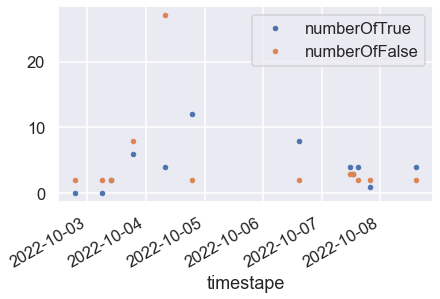

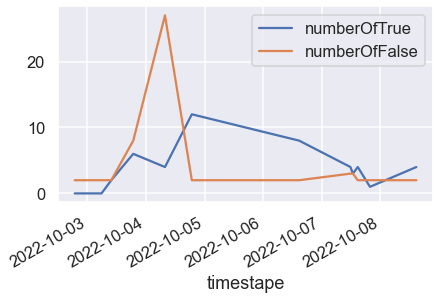

In [8]:
plt.figure(figsize=(45, 60))
df_False_filter.set_index('timestape').plot(style=".")
df_False_filter.set_index('timestape').plot()

#df_tress.set_index('timestape').plot(kind="bar")
#df_False_filter.set_index('timestape').plot()
plt.show()

## Conclusion for the relationship bewteen Signal.csv and Trespasser.csv: 

The data filtered here are the outliers above 90 percent. From the previous analysis of Signal, it can be seen that the fence dropping due to incoming trains is almost evenly spread out over each day and every day. However, the AI recognition errors are not almost evenly scattered throughout the day, but are suddenly very high at certain times. 

## Overall Conslusion and Suspicion:

In combination with CSV files, most of the error rate is mainly "Misclassification". And there are two main reasons for this, the first one is the wrong identification of the road, and the second one is the wrong identification of the train. 

1. And according to the current data, it is inferred that the first case occurs mainly in or after rainy weather in the afternoon, around 6:00 to 7:00. When there is water on the ground and the light reaches a certain angle, the recognition will be wrong.

2. The second case is mainly in the evening. I guess it is because the lights on the train make the AI recognize the car.

But more files are needed to prove my suspicion. If my guess is correct, we can focus mainly on the time period when these two scenarios are likely to occur

